In [10]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

print(tf.__version__)

2.4.1


In [2]:
# Load the fashion images. Like the MNIST data set, but kind of more fun. 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [15]:
# Need to map the class names to the train labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

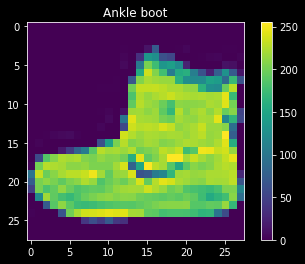

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# What do the images look like - 60,000 image 28x28 pixels
train_images.shape

(60000, 28, 28)

In [17]:
# Training labels - same number of labels as images
len(train_labels)

60000

In [19]:
test_images.shape # 10,000 images in the testing data

(10000, 28, 28)

In [23]:
"""
Now we need to normalize the data from 0-1.
"""
print("Max Val: ",np.max(train_images[0]))
print("Min Val: ",np.min(train_images[0]))

Max Val:  255
Min Val:  0


In [24]:
train_images = train_images / 255
test_images = test_images / 255

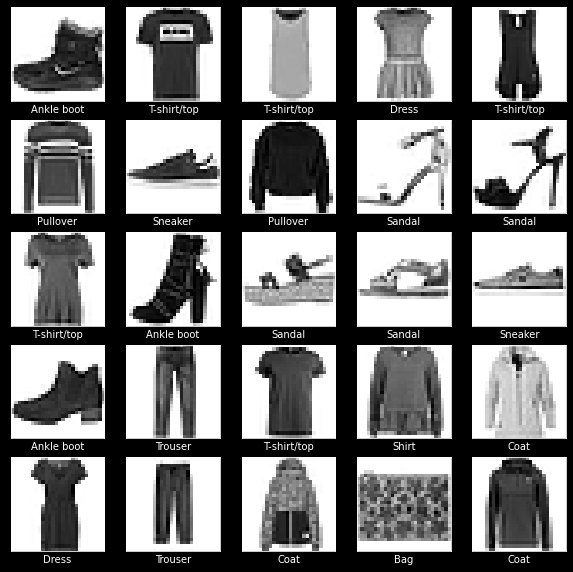

In [25]:
# Now let's show some of the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6209 - accuracy: 0.7842
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2745 - accuracy: 0.8991
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3424 - accuracy: 0.8813

Test accuracy: 0.8812999725341797


In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [32]:
# Throw all the data into the model and it will output some predictions
predictions = probability_model.predict(test_images)

In [36]:
# Checking prediction 1 - gives range of values it thinks it could be
predictions[0]

array([1.8668950e-07, 1.2025168e-10, 8.0589047e-10, 6.4561495e-10,
       5.6935667e-10, 7.1798690e-04, 1.5662620e-07, 9.8741392e-04,
       1.4773533e-06, 9.9829274e-01], dtype=float32)

In [37]:
# Find the value that is the maximum probability
np.argmax(predictions[0])

9

In [39]:
test_labels[0] # Check to see if it is correct 

9

In [54]:
def plot_image(i, predictions_array, true_label, img):
    """
    Plot the image
    Args
        i: index being checked
        true_label: test_label_list
        img: image image to use
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='white')

def plot_value_array(i, predictions_array, true_label):
    """
    Plot the input arrays. 
    Args:
        i: correct values index
        true_label: list of labels
        predictions_array: array of values that the model predicted
    """
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    _ = plt.xticks(range(10), class_names, rotation=90)


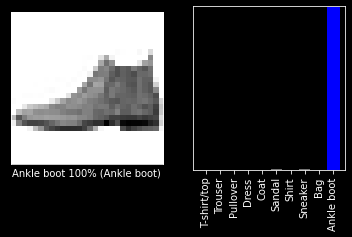

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

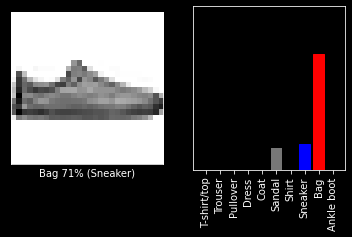

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

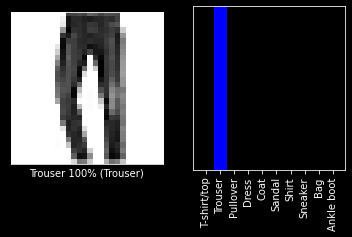

In [57]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

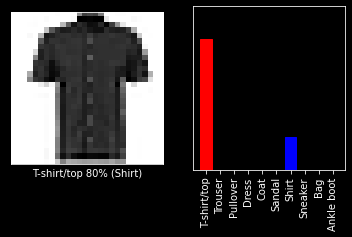

In [62]:
i = 40
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [63]:
# Now, let's make only one prediction you filthy animal. 
img = test_images[1]

print(img.shape)

(28, 28)


In [64]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [67]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.9590398e-04 7.1626456e-16 9.9138206e-01 7.8113863e-11 5.2785105e-03
  6.6179842e-13 2.9435412e-03 2.9617066e-16 4.3387136e-10 1.3798155e-14]]


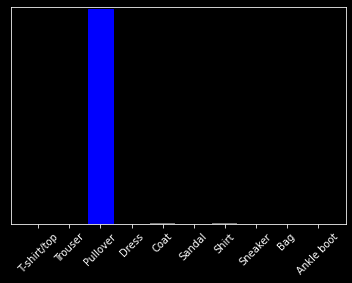

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


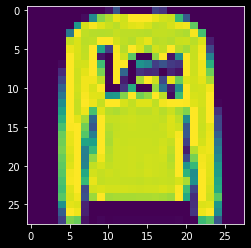

In [71]:
plt.imshow(img[0])

In [72]:
# Looks like it got it!